In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

We will solve multi-class classification using an ANN.

In [2]:
import tensorflow as tf
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import regularizers

2025-09-03 13:04:38.365240: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756904678.637723      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756904678.711847      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0].shape

(28, 28)

These are pixel values:

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train[0]

5

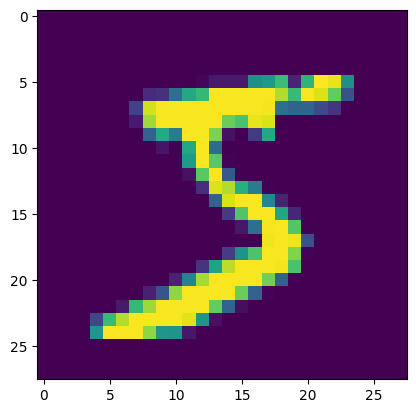

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

As pixel values are 255 so we will divide it by 255 so our pixel values can be normalized between 0-1

In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
model=Sequential()
model.add(Flatten(input_shape=(28,28))), #flattening into 1d vector
model.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.001))),
model.add(Dense(10,activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-09-03 13:04:57.555879: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor='val_loss',      # what to monitor (can also use 'val_accuracy')
    patience=5,              # stop if no improvement for 5 epochs
    restore_best_weights=True  # rollback to best model
)

In [15]:
print(x_train.shape, y_train.shape)


(60000, 28, 28) (60000,)


In [16]:
history=model.fit(x_train,y_train,epochs=50,validation_split=0.2,callbacks=[callback],batch_size=32)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8703 - loss: 0.6007 - val_accuracy: 0.9525 - val_loss: 0.2668
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9513 - loss: 0.2580 - val_accuracy: 0.9595 - val_loss: 0.2289
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9628 - loss: 0.2120 - val_accuracy: 0.9650 - val_loss: 0.2022
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9664 - loss: 0.1916 - val_accuracy: 0.9703 - val_loss: 0.1841
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9682 - loss: 0.1847 - val_accuracy: 0.9688 - val_loss: 0.1780
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9720 - loss: 0.1710 - val_accuracy: 0.9700 - val_loss: 0.1742
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9741 - loss: 0.1630 - val_accuracy: 0.9644 - val_loss: 0.1963
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9735 - loss: 0.1591 - 

In [17]:
model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[4.8874608e-07, 1.2277243e-07, 7.4702170e-06, ..., 9.9993795e-01,
        2.5397199e-07, 7.6272290e-06],
       [6.9709349e-06, 4.7799113e-05, 9.9886096e-01, ..., 5.7369154e-09,
        1.6975930e-05, 6.6470951e-10],
       [5.3848504e-05, 9.8967594e-01, 1.5186662e-03, ..., 4.1586780e-03,
        2.5914193e-03, 1.0044186e-04],
       ...,
       [1.3508615e-09, 2.5528781e-08, 9.8959985e-10, ..., 9.2260816e-06,
        1.0197895e-06, 4.0952538e-05],
       [1.8697607e-05, 4.4709384e-07, 4.2930957e-09, ..., 2.4876383e-07,
        1.9225492e-03, 1.5009534e-06],
       [2.2338152e-04, 3.3646563e-07, 4.7564161e-05, ..., 6.6321748e-09,
        1.3625385e-07, 5.3716008e-07]], dtype=float32)

This predicts the probability of an image being for all classes (0-9)

In [18]:
y_prob=model.predict(x_test)
y_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [19]:
print("Predicted:", y_prob[:20].argmax(axis=1))
print("Actual:   ", y_test[:20])


Predicted: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


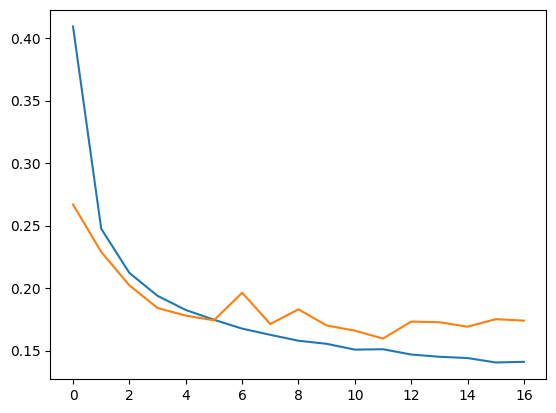

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])